In [1]:
# Importación de librerías necesarias
# -----------------------------------------------------------------------

# Tratamiento de datos
import pandas as pd
import numpy as np 
# -----------------------------------------------------------------------

# Imputación de nulos usando métodos avanzados estadísticos
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
# -----------------------------------------------------------------------

# Visualización y gráficos
import matplotlib.pyplot as plt
import seaborn as sns
# -----------------------------------------------------------------------


# Configuración para visualizar todas las columnas de los DataFrames
pd.set_option('display.max_columns', None)
# -----------------------------------------------------------------------

# Configuración para mejoras de la visualización
from IPython.display import display
# -----------------------------------------------------------------------

# Transformación de valores escritos en palabras a números
!pip install word2number
from word2number import w2n
# -----------------------------------------------------------------------

# Gestión de warnings
import warnings
warnings.filterwarnings("ignore")
# -----------------------------------------------------------------------

# Importación de DataFrames
df_hr= pd.read_csv("hr_raw_data.csv", index_col=0)

## 1. Exploratory Data Analysis and Preprocessing

### 1.1. **Data Exploration**

In [2]:
df_hr.head(5)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,"16280,83$",1972,"195370,00$",NaN,NaN,Yes
1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,NaN,1971,"199990,00$",NaN,NaN,1
2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,3,0,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,NaN,1981,"192320,00$",ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,1,4,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,Y,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,NaN,5,6,"14307,50$",1976,"171690,00$",NaN,NaN,False
4,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,1,5,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,"12783,92$",1977,NaN,NaN,NaN,0


In [3]:
df_hr.shape

(1678, 41)

In [4]:
df_hr.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'sameasmonthlyincome', 'datebirth', 'salary',
       'roledepartament', 'numberchildren', 'remotework'],
      dtype='object')

In [5]:
df_hr.nunique().sort_values(ascending=False)

employeenumber              1614
jobrole                     1579
dailyrate                    673
monthlyrate                  673
salary                       583
sameasmonthlyincome          493
monthlyincome                493
roledepartament              301
hourlyrate                   194
distancefromhome              69
age                           54
datebirth                     43
totalworkingyears             40
environmentsatisfaction       38
yearsatcompany                37
yearswithcurrmanager          18
yearssincelastpromotion       16
percentsalaryhike             15
yearsincurrentrole            10
numcompaniesworked            10
trainingtimeslastyear          7
educationfield                 6
remotework                     5
education                      5
maritalstatus                  5
joblevel                       5
jobsatisfaction                4
jobinvolvement                 4
worklifebalance                4
stockoptionlevel               4
relationsh

In [6]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1678 entries, 0 to 1677
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1678 non-null   object 
 1   attrition                 1678 non-null   object 
 2   businesstravel            877 non-null    object 
 3   dailyrate                 1678 non-null   float64
 4   department                312 non-null    object 
 5   distancefromhome          1678 non-null   int64  
 6   education                 1678 non-null   int64  
 7   educationfield            904 non-null    object 
 8   employeecount             1678 non-null   int64  
 9   employeenumber            1678 non-null   int64  
 10  environmentsatisfaction   1678 non-null   int64  
 11  gender                    1678 non-null   int64  
 12  hourlyrate                411 non-null    float64
 13  jobinvolvement            1678 non-null   int64  
 14  joblevel     

In [7]:
df_hr.describe().T

,count,mean,std,min,25%,50%,75%,max
dailyrate,1678.0,668.079714,470.787298,104.103175,290.035510,556.256661,971.956349,2063.388889
distancefromhome,1678.0,4.504172,14.652066,-49.000000,2.000000,5.000000,11.000000,29.000000
education,1678.0,2.932658,1.024270,1.000000,2.000000,3.000000,4.000000,5.000000
employeecount,1678.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
employeenumber,1678.0,809.859952,467.084867,1.000000,403.250000,813.500000,1215.750000,1614.000000
environmentsatisfaction,1678.0,4.264005,6.912695,1.000000,2.000000,3.000000,4.000000,49.000000
gender,1678.0,0.398689,0.489774,0.000000,0.000000,0.000000,1.000000,1.000000
hourlyrate,411.0,83.140768,57.272101,13.012897,36.254439,69.532083,116.987103,255.963294
jobinvolvement,1678.0,2.740763,0.710359,1.000000,2.000000,3.000000,3.000000,4.000000
joblevel,1678.0,2.064362,1.099425,1.000000,1.000000,2.000000,3.000000,5.000000


In [8]:
df_hr.duplicated().sum()

64

In [9]:
nulls = df_hr.isnull().sum()
nulls.sort_values(ascending=False)

numberchildren              1678
yearsincurrentrole          1643
department                  1366
roledepartament             1366
hourlyrate                  1267
over18                       938
businesstravel               801
educationfield               774
overtime                     696
maritalstatus                675
totalworkingyears            549
sameasmonthlyincome          489
monthlyincome                489
standardhours                351
salary                       285
performancerating            200
worklifebalance              114
trainingtimeslastyear          0
yearsatcompany                 0
relationshipsatisfaction       0
stockoptionlevel               0
yearssincelastpromotion        0
yearswithcurrmanager           0
datebirth                      0
age                            0
numcompaniesworked             0
percentsalaryhike              0
attrition                      0
monthlyrate                    0
jobsatisfaction                0
jobrole   

In [10]:
nulls_percentage = nulls/df_hr.shape[0]*100 # transformamos los nulos a porcentajes de nulos

columns_with_nulls = df_hr.columns[df_hr.isnull().any()]
columns_with_nulls

Index(['businesstravel', 'department', 'educationfield', 'hourlyrate',
       'maritalstatus', 'monthlyincome', 'over18', 'overtime',
       'performancerating', 'standardhours', 'totalworkingyears',
       'worklifebalance', 'yearsincurrentrole', 'sameasmonthlyincome',
       'salary', 'roledepartament', 'numberchildren'],
      dtype='object')

In [11]:
for col in columns_with_nulls:
    print(f'La columna "{col}" es de tipo: {df_hr.dtypes[col]}.')
    print(f'Su número de nulos es {nulls[col]}.')
    print(f'Su porcentaje de nulos es {nulls_percentage[col]}.')
    print('---------------------------------------------------')

La columna "businesstravel" es de tipo: object.
Su número de nulos es 801.
Su porcentaje de nulos es 47.735399284862936.
---------------------------------------------------
La columna "department" es de tipo: object.
Su número de nulos es 1366.
Su porcentaje de nulos es 81.40643623361144.
---------------------------------------------------
La columna "educationfield" es de tipo: object.
Su número de nulos es 774.
Su porcentaje de nulos es 46.12634088200238.
---------------------------------------------------
La columna "hourlyrate" es de tipo: float64.
Su número de nulos es 1267.
Su porcentaje de nulos es 75.50655542312276.
---------------------------------------------------
La columna "maritalstatus" es de tipo: object.
Su número de nulos es 675.
Su porcentaje de nulos es 40.226460071513706.
---------------------------------------------------
La columna "monthlyincome" es de tipo: object.
Su número de nulos es 489.
Su porcentaje de nulos es 29.141835518474373.
------------------------

In [12]:
df_hr['employeenumber'].nunique()

1614

In [13]:
df_hr['employeenumber'].duplicated().sum()

64

In [14]:
df_hr.sample(3)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
699,33,Yes,travel_rarely,351.619048,NaN,10,1,NaN,1,700,1,0,NaN,1,1,lABorATORY TEcHNiCiaN,4,Divorced,"2840,00$","7384,00$",7,Y,No,13,"3,0",1,Full Time,3,"8,0",2,"3,0",4,NaN,1,3,"2840,00$",1990,"34080,00$",NaN,NaN,0
1283,42,No,travel_rarely,1649.968254,NaN,23,5,NaN,1,1284,1,1,NaN,3,4,rEsEARcH DiRecTOR,4,Single,NaN,"34649,33$",2,Y,No,14,"3,0",2,Full Time,0,"16,0",2,"3,0",1,NaN,0,0,NaN,1981,"159920,00$",NaN,NaN,0
1541,45,No,travel_rarely,1582.771346,NaN,-33,2,Medical,1,1542,3,0,NaN,3,4,hEalThCARE rEpRESeNTATIVe,4,Married,"12783,92$","33238,20$",0,Y,Yes,14,"3,0",2,Full Time,0,"21,0",2,"3,0",20,NaN,4,10,"12783,92$",1978,"153407,07$",NaN,NaN,Yes


In [15]:
df_hr.head(20)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,"16280,83$",1972,"195370,00$",NaN,NaN,Yes
1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,NaN,1971,"199990,00$",NaN,NaN,1
2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,3,0,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,NaN,1981,"192320,00$",ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,1,4,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,Y,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,NaN,5,6,"14307,50$",1976,"171690,00$",NaN,NaN,False
4,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,1,5,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,"12783,92$",1977,NaN,NaN,NaN,0
5,48,No,NaN,1771.920635,Research & Development,22,3,Medical,1,6,4,1,NaN,3,4,MANAger,4,NaN,"14311,67$","37210,33$",3,NaN,No,11,"3,0",2,NaN,1,NaN,3,"3,0",22,NaN,4,7,"14311,67$",1975,NaN,MANAger - Research & Development,NaN,Yes
6,59,No,NaN,1032.487286,NaN,25,3,Life Sciences,1,7,1,1,NaN,3,3,Sales ExeCutIVe,1,NaN,"8339,32$","21682,23$",7,Y,NaN,11,"3,0",4,Part Time,0,"28,0",3,"2,0",21,NaN,7,9,"8339,32$",1964,"100071,84$",NaN,NaN,True
7,42,No,travel_rarely,556.256661,NaN,1,1,NaN,1,8,2,0,69.532083,3,2,Sales eXEcUTiVe,3,Married,NaN,"11681,39$",1,NaN,No,25,"4,0",3,Part Time,0,"20,0",3,"3,0",20,NaN,11,6,NaN,1981,"53914,11$",NaN,NaN,0
8,41,No,NaN,1712.182540,NaN,2,5,NaN,1,9,2,1,NaN,3,4,mANAGEr,1,Married,"13829,17$","35955,83$",7,NaN,No,16,"3,0",2,Full Time,1,"22,0",2,"3,0",18,NaN,11,8,"13829,17$",1982,"165950,00$",NaN,NaN,True
9,41,No,travel_frequently,1973.984127,NaN,9,3,NaN,1,10,1,0,NaN,3,5,reSEaRCH DIrectoR,3,NaN,"15943,72$","41453,67$",2,NaN,No,17,"3,0",2,NaN,1,"21,0",2,"4,0",18,NaN,0,11,"15943,72$",1982,NaN,NaN,NaN,0


**Observaciones del EDA:**

- **'age'**: seguramente debería estar en int64 en vez de en object
- **'dailyrate'**: ok en float64 pero seguramente deberíamos redondear a 2 decimales
- **'hourlyrate'**: ok en float64 pero seguramente deberíamos redondear a 2 decimales - TIENE NULOS // es posible que esta información sea redundante, ya que es lo mismo que **'dailyrate'** (que no tiene nulos)
- **'monthlyincome'**: seguramente debería estar en float64 en vez de en object - TIENE NULOS // es posible que esta información sea redundante, ya que es lo mismo que **'salary'** pero anualmente
- **'monthlyrate'**: seguramente debería estar en float64 en vez de en object // es posible que esta información sea redundante, ya que es lo mismo que **'dailyrate'** (que no tiene nulos)
- **'performancerating'**: podría estar en int64 o float64 en vez de en object // solo tiene 2 valores únicos - TIENE NULOS
- **'totalworkingyears'**: podría estar en int64 o float64 en vez de en object - TIENE NULOS
- **'worklifebalance'**: podría estar en int64 o float64 en vez de en object - TIENE NULOS
- **'yearsincurrentrole'**: podría estar en int64 o float64 en vez de en object - TIENE NULOS
- **'salary'**: podría estar en int64 o float64 en vez de en object - TIENE NULOS
- **'numberchildren'**: parece que no tiene ningún valor => tiene un 100% de valores nulos => seguramente la podamos eliminar
- **'gender'**: seguramente debería estar en tipo object en vez de en int64 => podrían reemplazarse por "M"/"F"
- **'employeenumber'**  => podría ser el ID del dataframe?
- **'distancefromhome'**: tiene valores negativos
- **'sameasmonthlyincome'**: es exactamente la misma columna que **'monthlyincome'** (con el mismo porcentaje de nulos) => seguramente la podamos eliminar
- **'jobrole'** y **'roledepartament'**: son lo mismo, solo que la segunda tiene muchísimos valores nulos - LA SEGUNDA TIENE NULOS
- **'employeecount'**: solo tiene un valor único => seguramente la podamos eliminar
- **'over18'**: solo tiene un valor único: Y, o nulos - TIENE NULOS
- **'standardhours'**: solo tiene 2 valores únicos - TIENE NULOS
- **'overtime'**: solo tiene 2 valores únicos Yes/No
- **'attrition'**: solo tiene 2 valores únicos Yes/No
- **'totalworkingyears'**: podría estar en int64 o float64 en vez de en object - TIENE NULOS
- **'worklifebalance'**: podría estar en int64 o float64 en vez de en object - TIENE NULOS
- **'yearsincurrentrole'**: podría estar en int64 o float64 en vez de en object - TIENE NULOS
- errores tipográficos en '**maritalstatus**' - TIENE NULOS
- **'businesstravel'**
- **'department'**
- **'educationfield'**
- Hay errores tipográficos en nombres de columnas y en entradas de algunas de las columnas => normalización

### 1.2. **Data Cleaning**

#### **Atypical Values, Data Types and Normalization**

**Observaciones:**

*Separamos entre las columnas que parece que vamos a poder cambiar desde ya porque no tienen nulos, y las que sí tienen nulos (que hasta que no gestionemos los mismos, no podremos modificar).*

> SIN NULOS:
- **'age'**: seguramente debería estar en int64 en vez de en object
- **'dailyrate'**: ok en float64 pero seguramente deberíamos redondear a 2 decimales
- **'monthlyrate'**: seguramente debería estar en float64 en vez de en object // es posible que esta información sea redundante, ya que es lo mismo que **'dailyrate'** (que no tiene nulos)
- **'gender'**: seguramente debería estar en tipo object en vez de en int64 => podrían reemplazarse por "M"/"F"
- **'distancefromhome'**: tiene valores negativos
- **'employeecount'**: solo tiene un valor único => seguramente la podamos eliminar
- **'overtime'**: solo tiene 2 valores únicos Yes/No
- **'attrition'**: solo tiene 2 valores únicos Yes/No
- **'remotework'** contiene datos inconsistentes, tendremos que normalizar los valores de esta columna.


> CON NULOS:
- **'hourlyrate'**: ok en float64 pero seguramente deberíamos redondear a 2 decimales - TIENE NULOS // es posible que esta información sea redundante, ya que es lo mismo que **'dailyrate'** (que no tiene nulos)
- **'monthlyincome'**: seguramente debería estar en float64 en vez de en object - TIENE NULOS // es posible que esta información sea redundante, ya que es lo mismo que **'salary'** pero anualmente
- **'totalworkingyears'**: podría estar en int64 o float64 en vez de en object - TIENE NULOS
- **'worklifebalance'**: podría estar en int64 o float64 en vez de en object - TIENE NULOS
- **'yearsincurrentrole'**: podría estar en int64 o float64 en vez de en object - TIENE NULOS
- **'salary'**: podría estar en int64 o float64 en vez de en object - TIENE NULOS
- **'sameasmonthlyincome'**: es exactamente la misma columna que **'monthlyincome'** (con el mismo porcentaje de nulos) => seguramente la podamos eliminar
- **'jobrole'** y **'roledepartament'**: son lo mismo, solo que la segunda tiene muchísimos valores nulos - LA SEGUNDA TIENE NULOS
- **'over18'**: solo tiene un valor único: Y, o nulos - TIENE NULOS
- **'standardhours'**: solo tiene 2 valores únicos - TIENE NULOS
- **'performancerating'**: podría estar en int64 o float64 en vez de en object // solo tiene 2 valores únicos - TIENE NULOS
- errores tipográficos en '**maritalstatus**' - TIENE NULOS

*Además, también hay columnas a las que a priori no hay que hacerles modificaciones pero que sí que tienen nulos:*
- **'businesstravel'**
- **'department'**
- **'educationfield'**
- **'overtime'**
- **'numberchildren'**: parece que no tiene ningún valor => tiene un 100% de valores nulos => seguramente la podamos eliminar

*Otras observaciones:*
- **'employeenumber'**: podría ser el ID del dataframe?
- Hay errores tipográficos en nombres de columnas y en entradas de algunas de las columnas => normalización

##### Modificaciones en columnas SIN NULOS:

##### Columna 'age':
**Observación:** *Seguramente debería estar en int64 en vez de en object*

In [16]:
# al intentar hacer: df_hr['age'] = df_hr['age'].astype(int)

# => nos salía el siguiente error: "ValueError: invalid literal for int() with base 10: 'forty-seven'"; 

# creamos una función donde usamos la librería word2number para pasar los valores escritos en formato palabra a números:
def convert_age(value):
    try:
        return w2n.word_to_num(value) # si está en palabra, conviértelo en número

    except ValueError:
        return value # si ya está como número, déjalo como estaba

# y ahora aplicamos dicha función a toda la columna:
df_hr['age'] = df_hr['age'].astype(str).apply(convert_age).astype(int) # primero convertimos todo a 'object' para asegurarnos de que el formato es uniforme, luego aplicamos la función, y finalmente pasamos todo a números

# y comprobamos:
df_hr['age']

0       51
1       52
2       42
3       47
4       46
        ..
1673    43
1674    47
1675    29
1676    47
1677    32
Name: age, Length: 1678, dtype: int64

##### Columna 'dailyrate':
**Observación:** *Ok en float64, pero seguramente deberíamos redondear a 2 decimales*

In [17]:
# 'dailyrate'
df_hr['dailyrate'] = df_hr['dailyrate'].round(2)

# y comprobamos:
df_hr['dailyrate']


0       2015.72
1       2063.39
2       1984.25
3       1771.40
4       1582.77
         ...   
1673     488.94
1674    1973.98
1675     290.04
1676    1032.49
1677     556.26
Name: dailyrate, Length: 1678, dtype: float64

##### Columna 'gender':
**Observación:** *Seguramente debería estar en tipo object en vez de en int64 => podrían reemplazarse por "M"/"F"*

In [18]:
# 'gender' => asumimos que 0 equivale a "male"  y 1 a "female"

# podríamos crear una función para que reemplace los valores 0 por "M" (Male) y 1 por "F" (Female),
# pero usando .map() es mucho más rápido y eficiente:
df_hr['gender'] = df_hr['gender'].map({0: 'M', 1: 'F'})

# y comprobamos:
df_hr['gender']

0       M
1       M
2       M
3       F
4       F
       ..
1673    F
1674    F
1675    M
1676    F
1677    F
Name: gender, Length: 1678, dtype: object

##### Columnas 'employeecount', 'numberchildren', 'sameasmonthlyincome, 'monthlyrate', 'hourlyrate', 'monthlyincome':
**Observaciones:**
- **'employeecount'**: *Solo tiene un valor único => seguramente la podamos eliminar*
- **'numberchildren'**: *Parece que no tiene ningún valor => tiene un 100% de valores nulos => seguramente la podamos eliminar*
- **'sameasmonthlyincome'**: *Es exactamente la misma columna que **'monthlyincome'** (con el mismo porcentaje de nulos) => seguramente la podamos eliminar*
- **'monthlyrate'** y **'hourlyrate'**: *Son redundantes, y además tienen nulos => ya tenemos la información completa en **'dailyrate'**, de modo que es esta la que decidimos mantener*
- **'monthlyincome'**: *Es redundante, pues tenemos **'salary'**, que es lo mismo pero anualmente*

In [19]:
df_hr.drop(columns=['employeecount', 'numberchildren', 'sameasmonthlyincome', 'monthlyrate', 'hourlyrate', 'monthlyincome'], inplace=True)

##### Columnas 'department', 'jobrole', 'roledepartament':

In [20]:
# evaluamos las 3 columnas 'department', 'jobrole', 'roledepartament'
df_hr[['department', 'jobrole', 'roledepartament']].head(10)

,department,jobrole,roledepartament
0,NaN,resEArch DIREcToR,NaN
1,NaN,ManAGeR,NaN
2,Research & Development,ManaGER,ManaGER - Research & Development
3,NaN,ReseArCH DIrECtOr,NaN
4,NaN,sAleS EXECUtIve,NaN
5,Research & Development,MANAger,MANAger - Research & Development
6,NaN,Sales ExeCutIVe,NaN
7,NaN,Sales eXEcUTiVe,NaN
8,NaN,mANAGEr,NaN
9,NaN,reSEaRCH DIrectoR,NaN


**Observaciones:** 
- *Las 3 columnas tienen datos similares; sin embargo, **'jobrole'** no tiene nulos, mientras que las otras 2 columnas sí. En lugar de tener que gestionar los nulos de **'department'** y **'roledepartament'** por separado, decidimos eliminar la columna **'roledepartament'** (que no es más que la concatenación de las otras 2 columnas), de modo que solo tenemos que gestionar **'department'**, que TIENE NULOS*
- *Normalizamos las entradas de **'jobrole'**  para que sean más legibles, y renombramos esta columna a **'role'**

In [21]:
df_hr.drop(columns=['roledepartament'], inplace=True)

In [22]:
# normalizamos
df_hr['jobrole'] = df_hr['jobrole'].str.title()

# cambiamos su nombre
df_hr.rename(columns={'jobrole': 'role'}, inplace=True)

# y comprobamos:
df_hr['role']

0             Research Director 
1                       Manager 
2                       Manager 
3             Research Director 
4               Sales Executive 
                  ...           
1673         Research Scientist 
1674                    Manager 
1675         Research Scientist 
1676     Manufacturing Director 
1677         Research Scientist 
Name: role, Length: 1678, dtype: object

##### Columna 'distancefromhome':
**Observaciones:**
- Contiene valores negativos. Consideramos que ha sido un error al introducir los datos por lo que vamos a convertir los negativos a su valor absoluto.

In [23]:
# sacamos el porcentaje de valores negativos sobre el total de valores de esta columna
distancefromhome_negative = df_hr['distancefromhome'] < 0
perc_neg = (df_hr[distancefromhome_negative][['distancefromhome']].count()) / (df_hr['distancefromhome'].count()) * 100
print(f"EL porcentaje de negativos en la columna 'distancefromhome' es: {perc_neg}")

# convertimos los negativos a su valor absoluto
df_hr['distancefromhome'] = df_hr['distancefromhome'].abs()

# comprobamos
df_hr['distancefromhome'].min()

EL porcentaje de negativos en la columna 'distancefromhome' es: distancefromhome    12.038141
dtype: float64


1

##### Columna 'remotework':
**Observaciones:**
- Está ok en tipo object pero contiene datos inconsistentes y mezcla de formatos (True/False, 1/0, Yes/No), por lo que debemos normalizar sus valores.
- Usaremos Yes para indicar cuando el empleado sí tiene teletrabajo (True, 1, Yes) y No para lo contrario (0, False)

In [24]:
df_hr['remotework'].value_counts()

remotework
1        375
True     362
False    318
0        318
Yes      305
Name: count, dtype: int64

In [25]:
# normalizamos 
df_hr['remotework'].replace({
    '1': 'Yes',
    'True': 'Yes',
    '0': 'No',
    'False': 'No'
}, inplace=True)

# comprobamos
df_hr['remotework'].value_counts()

remotework
Yes    1042
No      636
Name: count, dtype: int64

##### Columna 'environmentsatisfaction':
**Observaciones:**
- Los valores de esta columna deberían estar entre el rango del 1 al 4, sin embargo vemos que hay valores atípicos.

In [26]:
# vemos la distribución de valores únicos de esta columna (hay en torno a un 6% de valores fuera del rango)
df_hr['environmentsatisfaction'].value_counts(dropna=False, normalize=True) * 100

environmentsatisfaction
4     28.784267
3     28.069130
2     18.831943
1     18.235995
35     0.417163
12     0.417163
14     0.357569
13     0.357569
24     0.297974
47     0.297974
36     0.238379
48     0.238379
41     0.238379
46     0.238379
42     0.238379
45     0.178784
11     0.178784
22     0.178784
17     0.178784
18     0.178784
20     0.178784
25     0.178784
27     0.178784
37     0.119190
29     0.119190
19     0.119190
38     0.119190
31     0.119190
15     0.119190
16     0.119190
26     0.059595
39     0.059595
10     0.059595
49     0.059595
21     0.059595
28     0.059595
33     0.059595
43     0.059595
Name: proportion, dtype: float64

In [27]:
#vamos a convertir los valores fuera del rango del 1 al 4 en nulos para después poder imputarlos con la mediana.
df_hr['environmentsatisfaction'] = df_hr['environmentsatisfaction'].where(df_hr['environmentsatisfaction'].isin([1, 2, 3, 4]), np.nan)
df_hr['environmentsatisfaction'] = df_hr['environmentsatisfaction'].fillna(df_hr['environmentsatisfaction'].median())
#convertimos la columna de nuevo a tipo de dato entero
df_hr['environmentsatisfaction'] = df_hr['environmentsatisfaction'].astype(int)
#comprobamos de nuevo
df_hr['environmentsatisfaction'].value_counts(dropna=False, normalize=True) * 100

environmentsatisfaction
3    34.147795
4    28.784267
2    18.831943
1    18.235995
Name: proportion, dtype: float64

##### Modificaciones en columnas CON NULOS:

##### Columna 'salary':

**Observación:** *podría estar en int64 o float64 en vez de en object => tendremos que realizar este cambio antes de gestionar los nulos, ya que de lo contrario no estaría en formato numérico sino en 'object'*

In [28]:
# primero nos aseguramos de que todas las entradas de la columna están en formato 'object', luego eliminamos el símbolo del dólar, luego reemplazamos las comas (representan el separador decimal) por puntos, y finalmente lo pasamos a float y redondeamos a 2 decimales:
df_hr['salary'] = (df_hr['salary'].astype(str).str.replace(r'\$', '', regex=True).str.replace(',', '.', regex=True).astype(float).round(2))

# y comprobamos:
df_hr['salary'].head(5)

0    195370.0
1    199990.0
2    192320.0
3    171690.0
4         NaN
Name: salary, dtype: float64

##### Columna 'performancerating':

**Observación:** *podría estar en int64 o float64 en vez de en object => tendremos que realizar este cambio antes de gestionar los nulos, ya que de lo contrario no estaría en formato numérico sino en 'object'*

In [29]:
# primero convertimos todo a 'object' para asegurarnos de que todo está en formato texto
df_hr['performancerating'] = df_hr['performancerating'].astype(str)

# eliminamos el ',0'
df_hr['performancerating'] = df_hr['performancerating'].str.replace(',0', '', regex=False)

# convertimos los posibles valores de texto 'nan', 'None', 'NaN' a nulos
df_hr['performancerating'] = df_hr['performancerating'].replace(['nan', 'None', 'NaN'], np.nan)

# convertimos a float primero (de lo contrario, no aceptaría los nulos) y finalmente a int
df_hr['performancerating'] = df_hr['performancerating'].astype(float).astype('Int64')

# y comprobamos:
df_hr['performancerating'].unique()

<IntegerArray>
[3, 4, <NA>]
Length: 3, dtype: Int64

##### Columna 'totalworkingyears':

**Observación:** *podría estar en int64 o float64 en vez de en object => tendremos que realizar este cambio antes de gestionar los nulos, ya que de lo contrario no estaría en formato numérico sino en 'object'*

In [30]:
# cambiamos formato de la columna: 
#   - cambiamos ',' por '.' para marcar los decimales y cumplir con el formato de python
#   - cambiamos el tipo de dato de object a float
df_hr['totalworkingyears'] = (df_hr['totalworkingyears'].str.replace(',', '.', regex=True).astype(float).round(2))

# comprobamos: 
df_hr['totalworkingyears'].head(10)

0     NaN
1    34.0
2    22.0
3     NaN
4     NaN
5     NaN
6    28.0
7    20.0
8    22.0
9    21.0
Name: totalworkingyears, dtype: float64

##### Columna 'worklifebalance':

**Observación:** *podría estar en int64 o float64 en vez de en object => tendremos que realizar este cambio antes de gestionar los nulos, ya que de lo contrario no estaría en formato numérico sino en 'object'*

In [31]:
# cambiamos formato de la columna: 
#   - cambiamos ',' por '.' para marcar los decimales y cumplir con el formato de python
#   - cambiamos el tipo de dato de object a float 
df_hr['worklifebalance'] = (df_hr['worklifebalance'].str.replace(',', '.', regex=True).astype(float).round(2))

# comprobamos:
df_hr['worklifebalance'].value_counts()

worklifebalance
3.0    946
2.0    374
4.0    162
1.0     82
Name: count, dtype: int64

##### Columna 'yearsincurrentrole'

**Observación:** *podría estar en int64 o float64 en vez de en object => tendremos que realizar este cambio antes de gestionar los nulos, ya que de lo contrario no estaría en formato numérico sino en 'object'*

In [32]:
# cambiamos formato de la columna: 
#   - cambiamos ',' por '.' para marcar los decimales y cumplir con el formato de python
#   - cambiamos el tipo de dato de object a float
df_hr['yearsincurrentrole'] = (df_hr['yearsincurrentrole'].str.replace(',', '.', regex=True).astype(float).round(2))

# comprobamos:
yearsincurrentrole_no_null = df_hr['yearsincurrentrole'].notna()
df_hr[yearsincurrentrole_no_null].head(5)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,jobinvolvement,joblevel,role,jobsatisfaction,maritalstatus,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
38,60,No,travel_frequently,1059.19,NaN,28,3,NaN,39,3,F,2,3,Sales Executive,1,Married,4,Y,No,19,3,4,Full Time,0,22.0,5,4.0,18,13.0,13,11,1963,102660.00,Yes
49,32,No,travel_rarely,556.26,NaN,8,2,Technical Degree,50,3,F,2,2,Sales Executive,2,Married,1,NaN,Yes,11,3,4,Part Time,0,NaN,2,3.0,13,12.0,11,9,1991,53914.11,Yes
65,48,No,travel_rarely,1032.49,NaN,4,4,NaN,66,3,M,2,3,Healthcare Representative,3,Single,7,NaN,NaN,14,<NA>,2,Part Time,0,27.0,3,3.0,15,11.0,4,8,1975,100071.84,Yes
71,50,No,NaN,1032.49,NaN,17,5,Life Sciences,72,4,F,2,3,Research Director,1,NaN,5,NaN,No,15,3,3,Part Time,3,NaN,3,3.0,14,11.0,1,11,1973,100071.84,No
275,33,No,non-travel,634.11,NaN,12,2,NaN,276,3,M,3,2,Sales Executive,2,Marreid,0,NaN,NaN,13,3,1,Full Time,1,NaN,2,4.0,7,7.0,0,7,1990,61460.00,Yes


#### **Nulls Management**

*Primero tendremos que gestionar los nulos y luego cambiar el tipo de dato.*

*Separamos entre las variables categóricas y las numéricas.*

##### **NUMERICAL**

In [33]:
numerical_with_nulls = df_hr[df_hr.columns[df_hr.isnull().any()]].select_dtypes(include = "number").columns
numerical_with_nulls

Index(['performancerating', 'totalworkingyears', 'worklifebalance',
       'yearsincurrentrole', 'salary'],
      dtype='object')

***Evaluación de la distribución de las variables numéricas:***

In [34]:
for col in numerical_with_nulls:
    print(f'La columna "{col}" es de tipo: {df_hr.dtypes[col]}.')
    print(f'Su número de nulos es {nulls[col]}.')
    print(f'Su porcentaje de nulos es {nulls_percentage[col]}.')
    print('---------------------------------------------------')

La columna "performancerating" es de tipo: Int64.
Su número de nulos es 200.
Su porcentaje de nulos es 11.918951132300357.
---------------------------------------------------
La columna "totalworkingyears" es de tipo: float64.
Su número de nulos es 549.
Su porcentaje de nulos es 32.717520858164484.
---------------------------------------------------
La columna "worklifebalance" es de tipo: float64.
Su número de nulos es 114.
Su porcentaje de nulos es 6.793802145411204.
---------------------------------------------------
La columna "yearsincurrentrole" es de tipo: float64.
Su número de nulos es 1643.
Su porcentaje de nulos es 97.91418355184743.
---------------------------------------------------
La columna "salary" es de tipo: float64.
Su número de nulos es 285.
Su porcentaje de nulos es 16.98450536352801.
---------------------------------------------------


##### Columna 'performancerating':

*Evaluamos la distribución de la variable mediante visualizaciones, sin tener en cuenta los valores nulos*

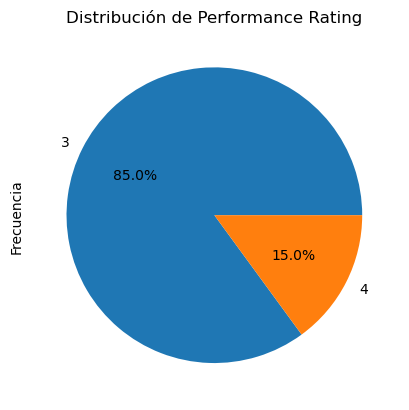

In [35]:
df_hr['performancerating'].dropna().value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribución de Performance Rating')
plt.ylabel('Frecuencia')

plt.show()

**Observaciones:**
- Su porcentaje de nulos es: 11.918951132300357
- '3' (85%) prevalece sobre '4' (15%) => por tanto, sería más interesante imputar con la mediana.

In [36]:
df_hr['performancerating'] = df_hr['performancerating'].fillna(df_hr['performancerating'].median())

# y comprobamos:
df_hr['performancerating'].unique()

<IntegerArray>
[3, 4]
Length: 2, dtype: Int64

##### Columna 'totalworkingyears':

*Evaluamos la distribución de la variable mediante visualizaciones, sin tener en cuenta los valores nulos*

<function matplotlib.pyplot.show(close=None, block=None)>

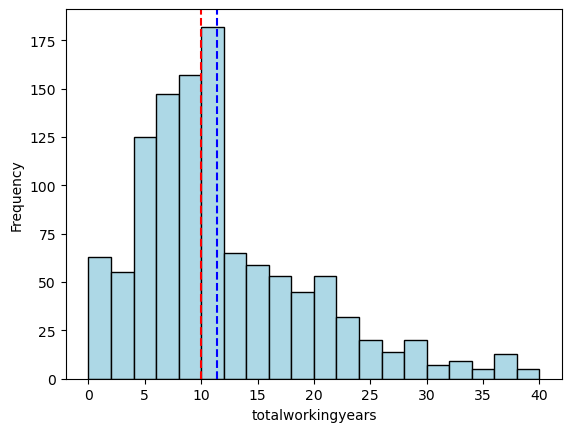

In [37]:
totalworkingyears_median = df_hr['totalworkingyears'].median()
totalworkingyears_mean = df_hr['totalworkingyears'].mean()

plt.hist(x = "totalworkingyears", 
         data = df_hr, 
         bins = 20, 
         color = "lightblue", 
         edgecolor = "black")
plt.axvline(x=totalworkingyears_median, color='red', linestyle='--', label=f'Median: {totalworkingyears_median}')
plt.axvline(x=totalworkingyears_mean, color='blue', linestyle='--', label=f'Mean: {totalworkingyears_mean}')
plt.xlabel("totalworkingyears")
plt.ylabel("Frequency")
plt.show

**Observaciones:**
- Su porcentaje de nulos es: 32% => ALTO
- Sigue una distribución asimétrica y tiene valores extremos
- Sospechamos que el número de años trabajados puede tener relación con otras columnas del df como pueden ser el puesto de trabajo => decidimos imputar los nulos con la técnica avanzada 'IterativeImputer'

In [38]:
imputer_iter = IterativeImputer(max_iter = 100, random_state = 42)
df_hr['totalworkingyears'] = imputer_iter.fit_transform(df_hr[['totalworkingyears']])

#convertimos a tipo de dato int para que no tenga decimales
df_hr['totalworkingyears'] = df_hr['totalworkingyears'].round(0).astype(int)

#comprobamos
df_hr['totalworkingyears']

0       11
1       34
2       22
3       11
4       11
        ..
1673    11
1674    27
1675     6
1676    11
1677    10
Name: totalworkingyears, Length: 1678, dtype: int64

##### Columna 'worklifebalance':

*Evaluamos la distribución de la variable mediante visualizaciones, sin tener en cuenta los valores nulos*

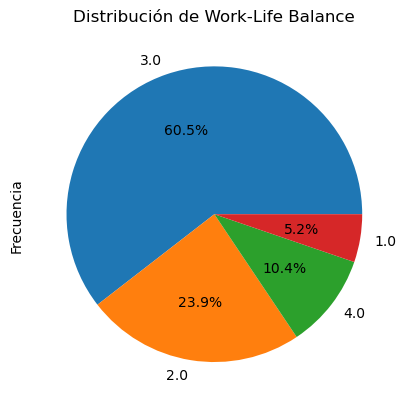

In [39]:
df_hr['worklifebalance'].dropna().value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribución de Work-Life Balance')
plt.ylabel('Frecuencia')

plt.show()

In [40]:
print(f"La media es: {np.round((df_hr['worklifebalance'].mean()), 0)}")
print(f"La mediana es: {df_hr['worklifebalance'].median()}")
print(f"La moda es: {df_hr['worklifebalance'].mode()[0]}")

La media es: 3.0
La mediana es: 3.0
La moda es: 3.0


**Observaciones:**
- Su porcentaje de nulos es: 7% => BAJO
- '3' (60%) prevalece sobre el  resto, por tanto, sería más interesante imputar con la mediana.
- Una vez imputados los nulos, cambiamos el tipo de dato de la columna para que sean enteros.

In [41]:
# sustituimos nulos por la mediana
df_hr['worklifebalance'] = df_hr['worklifebalance'].fillna(df_hr['worklifebalance'].median())

# cambiamos tipo de dato a int
df_hr['worklifebalance'] = df_hr['worklifebalance'].astype(int)

# comprobamos
df_hr['worklifebalance'].value_counts()

worklifebalance
3    1060
2     374
4     162
1      82
Name: count, dtype: int64

##### Columna 'yearsincurrentrole':

**Observaciones:**
- Su porcentaje de nulos es muy alto: 97%
- Consideramos que dado el alto porcentaje de nulos, no tenemos suficientes datos para poder imputar los nulos, por lo que procedemos a eliminar esta columna. 

In [42]:
# eliminamos la columna
df_hr.drop('yearsincurrentrole', axis = 1, inplace = True)

##### Columna 'salary':

*Evaluamos la distribución de la variable mediante visualizaciones, sin tener en cuenta los valores nulos*

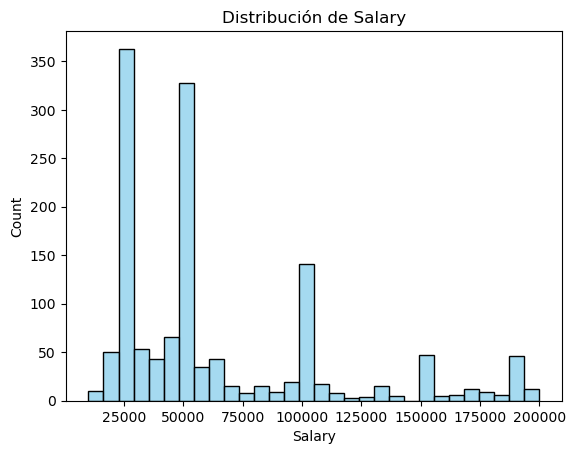

In [43]:
sns.histplot(df_hr['salary'], bins=30, color='skyblue')

plt.title("Distribución de Salary")
plt.xlabel('Salary')

plt.show()

**Observaciones:**
- Su porcentaje de nulos es: 16.98450536352801 => ALTO
- Sigue una distribución asimétrica
- Sospechamos que cada salario podría estar asociado a un puesto de trabajo distinto => decidimos imputar los nulos con la técnica avanzada 'IterativeImputer'

In [44]:
imputer_iterative = IterativeImputer(max_iter = 100, random_state = 42)
df_hr['salary'] = imputer_iterative.fit_transform(df_hr[['salary']])

# redondeamos:
df_hr['salary'] = df_hr['salary'].round(2)

# y comprobamos:
df_hr['salary'].head(5)

0    195370.00
1    199990.00
2    192320.00
3    171690.00
4     65070.91
Name: salary, dtype: float64

##### **CATEGORICAL**

In [45]:
categorical_with_nulls = df_hr[df_hr.columns[df_hr.isnull().any()]].select_dtypes(include = "O").columns
categorical_with_nulls

Index(['businesstravel', 'department', 'educationfield', 'maritalstatus',
       'over18', 'overtime', 'standardhours'],
      dtype='object')

***Evaluación de la distribución de las variables categóricas:***

In [46]:
for col in categorical_with_nulls:
    print(f'La columna "{col}" es de tipo: {df_hr.dtypes[col]}.')
    print(f'Su número de nulos es {nulls[col]}.')
    print(f'Su porcentaje de nulos es {nulls_percentage[col]}.')
    display(df_hr[col].value_counts(dropna=False, normalize=True) * 100)
    print('---------------------------------------------------')

La columna "businesstravel" es de tipo: object.
Su número de nulos es 801.
Su porcentaje de nulos es 47.735399284862936.


businesstravel
NaN                  47.735399
travel_rarely        36.710369
travel_frequently    10.011919
non-travel            5.542312
Name: proportion, dtype: float64

---------------------------------------------------
La columna "department" es de tipo: object.
Su número de nulos es 1366.
Su porcentaje de nulos es 81.40643623361144.


department
NaN                         81.406436
 Research & Development     12.097735
 Sales                       5.542312
 Human Resources             0.953516
Name: proportion, dtype: float64

---------------------------------------------------
La columna "educationfield" es de tipo: object.
Su número de nulos es 774.
Su porcentaje de nulos es 46.12634088200238.


educationfield
NaN                 46.126341
Life Sciences       21.871275
Medical             17.044100
Marketing            6.317044
Technical Degree     4.171633
Other                3.754470
Human Resources      0.715137
Name: proportion, dtype: float64

---------------------------------------------------
La columna "maritalstatus" es de tipo: object.
Su número de nulos es 675.
Su porcentaje de nulos es 40.226460071513706.


maritalstatus
NaN         40.226460
Married     24.970203
Single      20.441001
Divorced    11.561383
Marreid      2.145411
divorced     0.655542
Name: proportion, dtype: float64

---------------------------------------------------
La columna "over18" es de tipo: object.
Su número de nulos es 938.
Su porcentaje de nulos es 55.899880810488675.


over18
NaN    55.899881
Y      44.100119
Name: proportion, dtype: float64

---------------------------------------------------
La columna "overtime" es de tipo: object.
Su número de nulos es 696.
Su porcentaje de nulos es 41.477949940405246.


overtime
No     42.550656
NaN    41.477950
Yes    15.971395
Name: proportion, dtype: float64

---------------------------------------------------
La columna "standardhours" es de tipo: object.
Su número de nulos es 351.
Su porcentaje de nulos es 20.917759237187127.


standardhours
Part Time    55.244338
Full Time    23.837902
NaN          20.917759
Name: proportion, dtype: float64

---------------------------------------------------


**Observaciones:**
- **'department'**: no hay ninguna categoría dominante => sustituimos los nulos por una nueva categoría: 'Unknown'
- **'over18'**: tiene un valor único ('Y') y el resto son valores nulos (un 55,8%) => comprobamos en la columna **'age'** (sin nulos) si es probable que haya menores de edad; de lo contrario, asumimos que toda la columna es 'Y' y seguramente se podría eliminar esta columna
- **'standardhours'**: no hay ninguna categoría dominante => sustituimos los nulos por una nueva categoría: 'Unknown'
- **'educationfield'**: no hay ninguna categoría dominante => sustituimos los nulos por una nueva categoría: 'Unknown'
- **'overtime'**: no hay ninguna categoría dominante y el % de nulos es alto => sustituimos los nulos por una nueva categoría: 'Unknown'

##### Columnas 'department', 'standardhours' y 'educationfield' y 'overtime':

In [47]:
# creamos nuevas categorías para aquellas columnas donde no hay variables dominantes por las que imputar
df_hr['department'] = df_hr['department'].fillna('Unknown')
df_hr['standardhours'] = df_hr['standardhours'].fillna('Unknown')
df_hr['educationfield'] = df_hr['educationfield'].fillna('Unknown')
df_hr['overtime'] = df_hr['overtime'].fillna('Unknown')

##### Columna 'over18':

In [48]:
df_hr['age'].unique()

array([51, 52, 42, 47, 46, 48, 59, 41, 56, 38, 55, 40, 58, 35, 45, 33, 36,
       34, 53, 43, 60, 32, 37, 49, 39, 50, 44, 30, 29, 31, 54, 57, 27, 28,
       26, 25, 24, 23, 22, 21, 20, 19, 18])

Como todas las edades son > 18, decidimos eliminar la columna entera, ya que no aporta información relevante:

In [49]:
df_hr.drop(columns=['over18'], inplace=True)

##### Columna 'maritalstatus'

**Observaciones:**
- Tiene errores tipográficos que hace que los valores sean inconsistentes. Primero normalizaremos los valores de las columnas. 

In [50]:
# normalizamos:
df_hr['maritalstatus'] = df_hr['maritalstatus'].replace('Marreid', 'Married')
df_hr['maritalstatus'] = df_hr['maritalstatus'].replace('divorced', 'Divorced')

**Observaciones:**
- El porcentaje de nulos es: 40% => ALTO
- No hay una categoría especialmente dominante
- Optamos por crear una nueva categoría para imputar los nulos => 'Unknown'

In [51]:
df_hr['maritalstatus'] = df_hr['maritalstatus'].fillna('Unknown')

# comprobamos cómo ha quedado
print(f"Tipo de dato: {df_hr['maritalstatus'].dtypes}")
print(f"Distribucion de categorias (incluyendo nulos): {np.round((df_hr['maritalstatus'].value_counts(dropna=False, normalize=True) * 100) , 2)}")
print(f"Porcentaje de nulos: {np.round((df_hr['maritalstatus'].isnull().sum() / df_hr.shape[0] *100), 2)}")

Tipo de dato: object
Distribucion de categorias (incluyendo nulos): maritalstatus
Unknown     40.23
Married     27.12
Single      20.44
Divorced    12.22
Name: proportion, dtype: float64
Porcentaje de nulos: 0.0


##### Columna 'businesstravel'

**Observaciones:**
- Cambiamos los valores de la columna para que sean más entendibles

In [52]:
df_hr['businesstravel'] = df_hr['businesstravel'].replace({'travel_rarely': 'Rarely', 'travel_frequently': 'Frequently', 'non-travel': 'Never'})

**Observaciones:**
- El porcentaje de nulos es: 47% => ALTO
- No hay una categoría especialmente dominante
- Optamos por crear una nueva categoría para imputar los nulos

In [53]:
df_hr['businesstravel'] = df_hr['businesstravel'].fillna('Unknown')

# comprobamos cómo ha quedado
print(f"Tipo de dato: {df_hr['businesstravel'].dtypes}")
print(f"Distribucion de categorias (incluyendo nulos): {np.round((df_hr['businesstravel'].value_counts(dropna=False, normalize=True) * 100) , 2)}")
print(f"Porcentaje de nulos: {np.round((df_hr['businesstravel'].isnull().sum() / df_hr.shape[0] *100), 2)}")


Tipo de dato: object
Distribucion de categorias (incluyendo nulos): businesstravel
Unknown       47.74
Rarely        36.71
Frequently    10.01
Never          5.54
Name: proportion, dtype: float64
Porcentaje de nulos: 0.0


##### *Comprobamos que ya no quedan columnas con nulos*

In [54]:
df_hr.isnull().sum()

age                         0
attrition                   0
businesstravel              0
dailyrate                   0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeenumber              0
environmentsatisfaction     0
gender                      0
jobinvolvement              0
joblevel                    0
role                        0
jobsatisfaction             0
maritalstatus               0
numcompaniesworked          0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
standardhours               0
stockoptionlevel            0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
yearsatcompany              0
yearssincelastpromotion     0
yearswithcurrmanager        0
datebirth                   0
salary                      0
remotework                  0
dtype: int64

#### **Column Names Normalization**

In [55]:
df_columns = df_hr.columns

#creamos un diccionario que contiene como clave los nombres antiguos y como valor los nombres nuevos que queremos dar a cada columna
new_columns = {
    'businesstravel': 'business_travel',
    'dailyrate': 'daily_rate',
    'distancefromhome': 'distance_from_home',
    'educationfield': 'education_field',
    'employeenumber': 'employee_number',
    'environmentsatisfaction': 'environment_satisfaction',
    'jobinvolvement': 'job_involvement',
    'joblevel': 'job_level',
    'jobsatisfaction': 'job_satisfaction',
    'maritalstatus': 'marital_status',
    'numcompaniesworked': 'num_companies_worked',
    'percentsalaryhike': 'percent_salary_hike',
    'performancerating': 'performance_rating',
    'relationshipsatisfaction': 'relationship_satisfaction',
    'standardhours': 'standard_hours',
    'stockoptionlevel': 'stock_option_level',
    'totalworkingyears': 'total_working_years',
    'trainingtimeslastyear': 'training_times_last_year',
    'worklifebalance': 'work_life_balance',
    'yearsatcompany': 'years_at_company',
    'yearssincelastpromotion': 'years_since_last_promotion',
    'yearswithcurrmanager': 'years_with_curr_manager',
    'datebirth': 'date_birth',
    'remotework': 'remote_work'
}

# aplicamos el diccionario con los nuevos nombres de columnas al df
df_hr.rename(columns=new_columns, inplace=True)

# comprobamos
df_hr.sample(5)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,role,job_satisfaction,marital_status,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,date_birth,salary,remote_work
776,42,No,Unknown,290.04,Unknown,10,4,Technical Degree,777,3,M,3,1,Research Scientist,3,Married,3,No,22,4,2,Part Time,2,10,1,2,6,3,3,1981,28111.13,No
678,38,No,Rarely,556.26,Unknown,1,4,Life Sciences,679,1,F,2,2,Sales Executive,4,Single,4,Unknown,22,3,3,Unknown,0,12,2,4,8,0,7,1985,65070.91,No
387,43,No,Frequently,1032.49,Unknown,27,3,Life Sciences,388,3,F,3,3,Manufacturing Director,1,Married,8,No,11,3,3,Part Time,1,18,1,3,8,0,1,1980,100071.84,No
1623,36,No,Rarely,556.26,Sales,14,4,Unknown,168,3,F,2,2,Sales Executive,3,Married,1,Yes,13,3,1,Part Time,1,10,4,3,10,1,7,1987,53914.11,No
1270,51,No,Unknown,280.94,Unknown,38,3,Unknown,1271,3,M,3,1,Research Scientist,4,Married,1,No,11,3,2,Part Time,0,1,0,2,1,0,0,1972,27230.00,Yes


#### **Duplicates Management**

In [56]:
# Primero creamos una máscara para ver todos los duplicados (incluyendo todas sus apariciones), pero el resultado no nos dice mucho

duplicates = df_hr[df_hr.duplicated(keep=False)]
duplicates

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,role,job_satisfaction,marital_status,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,date_birth,salary,remote_work
8,41,No,Unknown,1712.18,Unknown,2,5,Unknown,9,2,F,3,4,Manager,1,Married,7,No,16,3,2,Full Time,1,22,2,3,18,11,8,1982,165950.00,Yes
60,36,No,Unknown,610.17,Unknown,5,2,Unknown,61,4,M,3,2,Laboratory Technician,2,Single,8,No,16,3,4,Full Time,0,16,3,4,13,3,7,1987,59140.00,Yes
75,47,No,Rarely,1032.49,Unknown,4,3,Life Sciences,76,3,F,2,3,Manufacturing Director,2,Divorced,8,Yes,12,3,3,Part Time,1,11,4,3,22,14,10,1976,100071.84,Yes
107,29,No,Rarely,1032.49,Unknown,21,4,Life Sciences,108,2,F,4,3,Manufacturing Director,1,Divorced,1,No,11,3,3,Unknown,1,10,1,3,10,8,8,1994,65070.91,No
111,30,No,Rarely,1032.49,Unknown,5,3,Unknown,112,2,F,3,3,Sales Executive,4,Unknown,2,No,12,3,3,Part Time,1,11,2,3,10,7,4,1993,100071.84,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,43,No,Unknown,488.94,Unknown,26,3,Medical,824,2,F,4,1,Research Scientist,3,Single,4,Unknown,12,3,4,Unknown,0,11,2,3,3,1,2,1980,65070.91,Yes
1674,47,No,Unknown,1973.98,Unknown,26,4,Unknown,1087,4,F,3,5,Manager,3,Married,3,No,11,3,3,Full Time,1,27,2,3,5,1,0,1976,191324.62,No
1675,29,No,Rarely,290.04,Unknown,15,3,Unknown,528,3,M,3,1,Research Scientist,4,Unknown,1,No,19,3,1,Part Time,0,6,1,3,6,1,5,1994,28111.13,No
1676,47,No,Rarely,1032.49,Unknown,4,3,Life Sciences,76,3,F,2,3,Manufacturing Director,2,Divorced,8,Yes,12,3,3,Part Time,1,11,4,3,22,14,10,1976,100071.84,Yes


In [57]:
# Nos fijamos en la columna employee_number ya que es la columna que identifica a cada empleado y vemos que hay 64 valores duplicados

df_hr['employee_number'].duplicated().sum()

64

In [58]:
# Vamos a filtrar nuestro df para ver únicamente los employee_number duplicados (con subset especificamos sobre qué columna queremos comprobar los duplicados)

df_hr[df_hr.duplicated(subset='employee_number', keep=False)].sort_values(by='employee_number')

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,job_involvement,job_level,role,job_satisfaction,marital_status,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,date_birth,salary,remote_work
8,41,No,Unknown,1712.18,Unknown,2,5,Unknown,9,2,F,3,4,Manager,1,Married,7,No,16,3,2,Full Time,1,22,2,3,18,11,8,1982,165950.00,Yes
1656,41,No,Unknown,1712.18,Unknown,2,5,Unknown,9,2,F,3,4,Manager,1,Married,7,No,16,3,2,Full Time,1,22,2,3,18,11,8,1982,165950.00,Yes
60,36,No,Unknown,610.17,Unknown,5,2,Unknown,61,4,M,3,2,Laboratory Technician,2,Single,8,No,16,3,4,Full Time,0,16,3,4,13,3,7,1987,59140.00,Yes
1652,36,No,Unknown,610.17,Unknown,5,2,Unknown,61,4,M,3,2,Laboratory Technician,2,Single,8,No,16,3,4,Full Time,0,16,3,4,13,3,7,1987,59140.00,Yes
1676,47,No,Rarely,1032.49,Unknown,4,3,Life Sciences,76,3,F,2,3,Manufacturing Director,2,Divorced,8,Yes,12,3,3,Part Time,1,11,4,3,22,14,10,1976,100071.84,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,48,No,Rarely,417.96,Unknown,2,5,Unknown,1568,2,F,3,2,Sales Executive,4,Married,2,No,14,3,1,Part Time,1,14,2,3,9,6,7,1975,40510.00,Yes
1657,45,No,Rarely,495.75,Unknown,2,3,Other,1569,4,M,3,2,Sales Executive,2,Unknown,0,No,19,3,2,Part Time,1,11,3,4,8,3,7,1978,48050.00,No
1568,45,No,Rarely,495.75,Unknown,2,3,Other,1569,4,M,3,2,Sales Executive,2,Unknown,0,No,19,3,2,Part Time,1,11,3,4,8,3,7,1978,48050.00,No
1671,31,No,Unknown,556.26,Unknown,12,3,Medical,1608,4,F,3,2,Healthcare Representative,4,Unknown,0,Unknown,11,3,3,Part Time,2,10,2,1,9,8,5,1992,53914.11,Yes


In [59]:
# Verificamos que los employee_number que aparecen repetidos son efectivamente duplicados por lo que vamos a eliminarlos, manteniendo
# en nuestro dataframe la primera ocurrencia

df_hr=df_hr.drop_duplicates(keep='first')

##### *Comprobamos que ya no quedan entradas duplicadas*

In [60]:
df_hr.duplicated().sum()

0

In [61]:
# comprobamos que ya no son 1678 registros, y que ya sólo hay un employee_number por cada fila
df_hr['employee_number'].nunique()

1614

In [62]:
# movemos la columna employee_number al inicio del df ya que es el identificador de cada empleado y facilita la lectura de los datos
col = df_hr.pop('employee_number')
df_hr.insert(0, 'employee_number', col)

df_hr.head()

,employee_number,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,job_involvement,job_level,role,job_satisfaction,marital_status,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,date_birth,salary,remote_work
0,1,51,No,Unknown,2015.72,Unknown,6,3,Unknown,1,M,3,5,Research Director,3,Unknown,7,No,13,3,3,Full Time,0,11,5,3,20,15,15,1972,195370.00,Yes
1,2,52,No,Unknown,2063.39,Unknown,1,4,Life Sciences,3,M,2,5,Manager,3,Unknown,0,Unknown,14,3,1,Unknown,1,34,5,3,33,11,9,1971,199990.00,Yes
2,3,42,No,Rarely,1984.25,Research & Development,4,2,Technical Degree,3,M,3,5,Manager,4,Married,1,No,11,3,4,Unknown,0,22,3,3,22,11,15,1981,192320.00,Yes
3,4,47,No,Rarely,1771.40,Unknown,2,4,Medical,1,F,3,4,Research Director,3,Married,3,Unknown,19,3,2,Full Time,2,11,2,3,20,5,6,1976,171690.00,No
4,5,46,No,Unknown,1582.77,Unknown,3,3,Technical Degree,1,F,4,4,Sales Executive,1,Divorced,2,No,12,3,4,Unknown,1,11,5,3,19,2,8,1977,65070.91,No


#### *Guardamos el fichero final sobre el que hemos realizado la limpieza*

In [63]:
df_hr.to_csv('df_hr_final.csv')

## 2. Data visualization

#### **Datos descriptivos**

#### *Distribución empleados/as por edad*

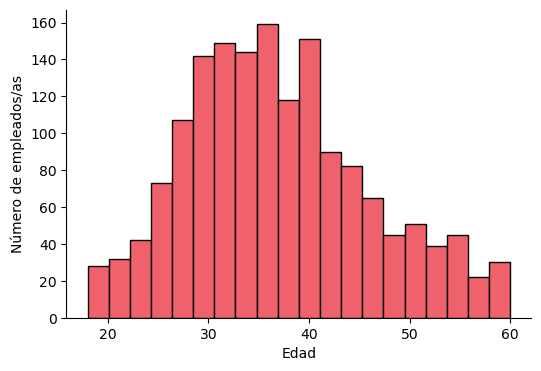

In [64]:
plt.figure(figsize=(6, 4))

plt.hist(x = "age", 
         data = df_hr, 
         bins = 20, 
         color= "#EF626C",
         edgecolor = "black")

# nombre del eje x
plt.xlabel("Edad")

# nombre del eje y
plt.ylabel("Número de empleados/as")

plt.gca().spines['right'].set_visible(False) #Eliminación línea derecha gráfico.
plt.gca().spines["top"].set_visible(False) #Eliminación línea superior gráfico.

In [65]:
# Calculamos el promedio de edad

age_mean = df_hr['age'].mean()
print(f"El promedio de edad es de {np.round(age_mean, 0)}")

El promedio de edad es de 37.0


**Observaciones:**
- Vemos que la mayoría de los empleados están comprendidos entre los 25 y los 40 años, estando el **pico de empleados entre los 30 y 40 años** (siendo 37 el promedio de edad).
- **Hay pocos empleados menores de 25 años** -> esto puede indicar o bien que la empresa contrata menos personas con poca experiencia, o bien que los empleados más jóvenes permanecen menos tiempo en la empresa. 
- **Hay pocos empleados mayores de 50 años** -> esto puede indicar o bien que hay menos retención del talento más sénior o bien que los empleados pueden acogerse a alguna política de jubilación anticipada.
- Al estar el grupo más representado entre los 30 y 40 años, siendo ésta la etapa de consolidación profesional, es clave ofrecer a estos empleados oportunidades de ascenso o crecimiento profesional para evitar la rotación en el futuro.

#### *Distribución empleados/as por género*

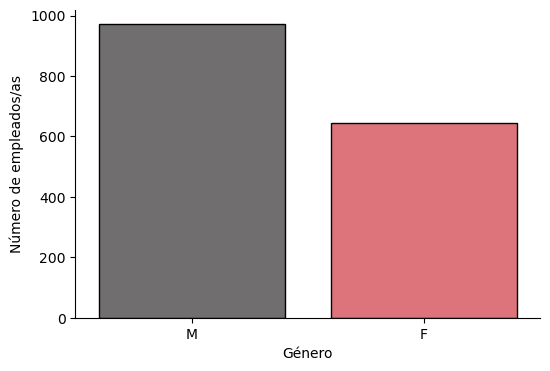

In [66]:
plt.figure(figsize=(6, 4))

sns.countplot(x='gender', data=df_hr, palette=("#706E6E", "#EF626C"), edgecolor = "black")

plt.gca().spines['right'].set_visible(False) #Eliminación línea derecha gráfico.
plt.gca().spines["top"].set_visible(False) #Eliminación línea superior gráfico.

plt.xlabel('Género') # Título eje x
plt.ylabel('Número de empleados/as') # Título eje y

plt.show()

In [67]:
# si quisiéramos tener esto en porcentajes: 
gender_count = df_hr['gender'].value_counts(normalize=True) * 100

print(f'La frecuencia relativa de los empleados en función de su género es la siguiente: \n{gender_count}')

La frecuencia relativa de los empleados en función de su género es la siguiente: 
gender
M    60.16109
F    39.83891
Name: proportion, dtype: float64


**Observaciones:**
- Se observa que hay **más empleados masculinos (60%) que femeninos (40%)**.
- Aunque es una diferencia significativa, está **en linea con el sector** al que pertenece la empresa (la consultoría tecnológica).

#### *Número de empleados/as en activo y tasa de retención*

In [68]:
# primero vemos el número total de empleados en la compañía (activos y dados de baja)
total_employees = df_hr['employee_number'].count()

print(f'El número total de empleados en la compañía, incluyendo tanto los activos como dados de baja, es: {total_employees}.')

El número total de empleados en la compañía, incluyendo tanto los activos como dados de baja, es: 1614.


In [69]:
# vemos el número de empleados que están en activo en la empresa y los que se han dado de baja
df_hr.groupby('attrition')['employee_number'].count()

# => actualmente hay 1355 empleados activos en la empresa

attrition
No     1355
Yes     259
Name: employee_number, dtype: int64

In [70]:
# guardamos el número de empleados dados de baja en una variable para poder calcular después la tasa de retención
employees_non_active = (df_hr["attrition"] == "Yes").sum()
employees_non_active

# calculamos la tasa de retención: (1-(nº de empleados que se fueron / total de empleados)) * 100
retention_rate = (1 - (employees_non_active / total_employees)) * 100
print(f'La tasa de retención de la empresa es del {retention_rate}%.')

print(f'La tasa de rotación de la empresa es del {100-retention_rate}%.')

La tasa de retención de la empresa es del 83.95291201982651%.
La tasa de rotación de la empresa es del 16.047087980173487%.


**Observaciones:**
- Actualmente en la empresa hay **1.355 empleados** en activo. 
- En el periodo analizado, se han dado de baja 259 empleados, esto supone una **tasa de retención de casi un 84%**, lo cual es bastante favorable y va en línea con el sector (consultoría tecnológica).
- La **tasa de rotación es del 16%**.

#### *Antigüedad de los empleados/as*

In [71]:
# promedio de antigüedad
avg_years_company = df_hr['years_at_company'].mean()

print(f'El promedio de antigüedad de los empleados es de: {avg_years_company} años en la empresa.')

El promedio de antigüedad de los empleados es de: 7.132589838909541 años en la empresa.


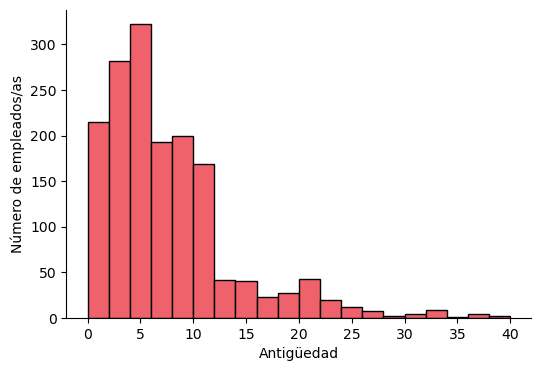

In [72]:
plt.figure(figsize=(6, 4))

plt.hist(x = "years_at_company", 
         data = df_hr, 
         bins = 20, 
         color= "#EF626C",
         edgecolor = "black")

# nombre del eje x
plt.xlabel("Antigüedad")

# nombre del eje y
plt.ylabel("Número de empleados/as")

plt.gca().spines['right'].set_visible(False) #Eliminación línea derecha gráfico.
plt.gca().spines["top"].set_visible(False) #Eliminación línea superior gráfico.

In [73]:
df_hr['years_at_company'].describe()

count    1614.000000
mean        7.132590
std         6.124237
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: years_at_company, dtype: float64

In [74]:
# antigüedad media de los empleados que se van
df_hr[df_hr["attrition"] == "Yes"]["years_at_company"].mean()

# si quisiéramos ver la antigüedad de la mayoría de personas que se van
# df_hr[df_hr["attrition"] == "Yes"]["years_at_company"].mode()[0]

5.409266409266409

**Observaciones:**
- La antigüedad media de los empleados es de 7 años. 
- El 50% de los empleados tienen una antigüedad de 5 años.  
- El 75% de los empleados tienen una antigüedad inferior a 10 años. 
- La mayoría de empleados que se van tienen una antigüedad inferior a 5 años.

#### *Satisfacción general*

In [75]:
df_hr['job_satisfaction'].value_counts(normalize=True) * 100

job_satisfaction
4    31.846344
3    29.801735
1    19.640644
2    18.711276
Name: proportion, dtype: float64

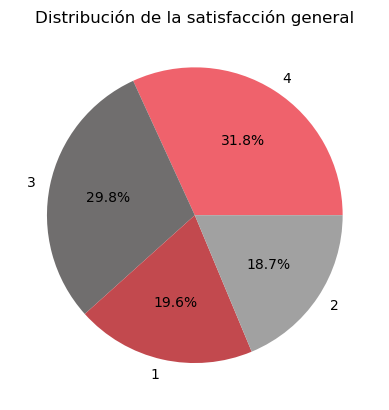

In [76]:
df_hr['job_satisfaction'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#EF626C', '#706E6E', '#C2494E', '#A1A1A1'])
plt.title('Distribución de la satisfacción general')
plt.ylabel('')
plt.show()

**Observaciones:**
- El 60% de los empleados han marcado su satisfacción general entre un 3 y un 4, lo que significa que en general los empleados están satisfechos con su trabajo. 

#### **Cruces de variables**

#### *Relación entre el salario y el abandono de la empresa*

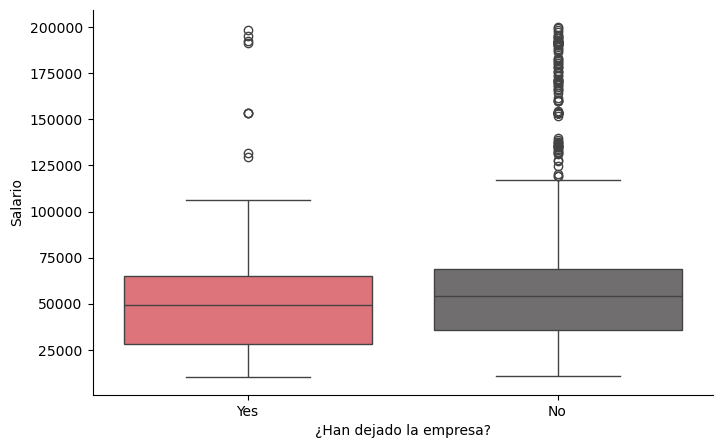

In [77]:
plt.figure(figsize=(8, 5))

sns.boxplot(x='attrition', y='salary', data=df_hr, palette=("#EF626C", "#706E6E"), order=['Yes', 'No'])

plt.gca().spines['right'].set_visible(False) #Eliminación línea derecha gráfico.
plt.gca().spines["top"].set_visible(False) #Eliminación línea superior gráfico.

plt.xlabel('¿Han dejado la empresa?')
plt.ylabel('Salario')

plt.show()

In [78]:
# comparamos el salario promedio de los que han abandonado la empresa y los que no
df_hr.groupby('attrition')['salary'].mean()

attrition
No     67732.775897
Yes    52050.157992
Name: salary, dtype: float64

**Observaciones:**
- El salario promedio de los empleados que dejan la empresa es inferior al de los empleados que siguen en la empresa, aunque no es una diferencia muy significativa. 
- En los empleados que se han ido de la empresa hay mayor concentración en la parte baja de la distribución. Hay algunos salarios altos que han dejado la empresa pero son menos frecuentes. 
- En los empleados que siguen en la empresa, podemos ver más casos de salarios altos (outliers), lo que puede indicar que los salarios mejor pagados tienden a quedarse más tiempo.

**Conclusión:**
- Aunque podemos ver cierta tendencia, no parece que el salario sea un factor único o decisivo entre los que dejan la empresa, por lo que vamos a proceder a analizar otras variables como son la satisfacción con el entorno de trabajo, la modalidad de trabajo o el tipo de jornada. 


#### *Relación entre la valoración del ambiente de trabajo y el abandono de la empresa*

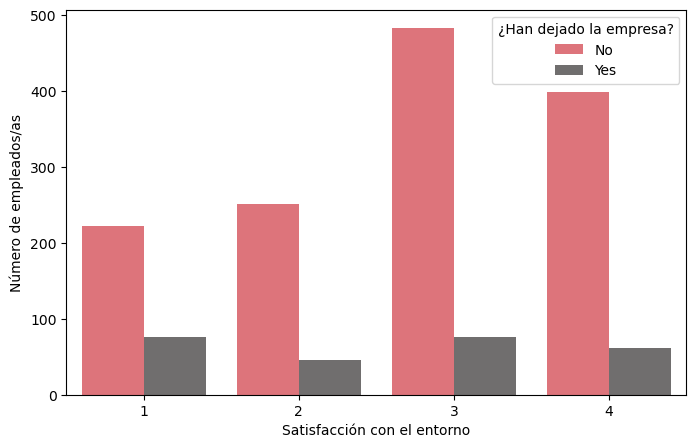

In [79]:
plt.figure(figsize=(8, 5))
sns.countplot(x='environment_satisfaction', hue='attrition', data=df_hr, palette=["#EF626C", "#706E6E"])

plt.xlabel('Satisfacción con el entorno')
plt.ylabel('Número de empleados/as')
plt.legend(title='¿Han dejado la empresa?')

plt.show()

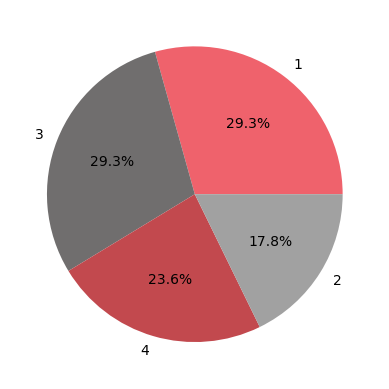

In [80]:
# Foco en aquellos que han abandonado la empresa
df_hr[df_hr['attrition'] == 'Yes']['environment_satisfaction'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#EF626C', '#706E6E', '#C2494E', '#A1A1A1'])
plt.ylabel('')
plt.show()

#titulo gráfico 'Satisfacción con el entorno de empleados que han dejado la empresa'

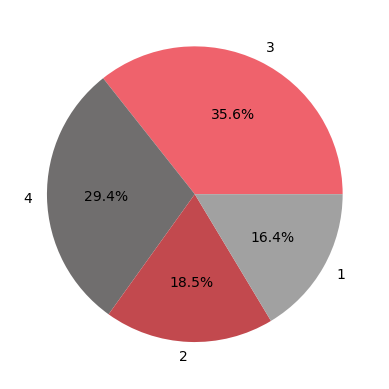

In [81]:
# Foco en aquellos que siguen en la empresa
df_hr[df_hr['attrition'] == 'No']['environment_satisfaction'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#EF626C', '#706E6E', '#C2494E', '#A1A1A1'])
plt.ylabel('')
plt.show()

#titulo gráfico 'Satisfacción con el entorno de empleados que siguen en la empresa'

**Observaciones:**
- Observamos que entre los empleados que no han dejado la empresa, el 65% tienen un índice de satisfacción con el entorno mayor de 3. Sólo un 35% tienen índice inferior a 3. 
- Mientras que entre los empleados que han dejado la empresa, sólo el 53% tienen un índice de satisfacción con el entorno mayor de 3. El otro 47% (casi la mitad) tienen índice inferior a 3.
- Hay practicamente 10 puntos de diferencia. 

**Conclusiones:**
- Esto podría sugerir que la insatisfacción con el entorno es un factor relevante en la decisión de dejar la empresa.

#### *Relación entre los años en la empresa y la valoración del balance vida-trabajo*

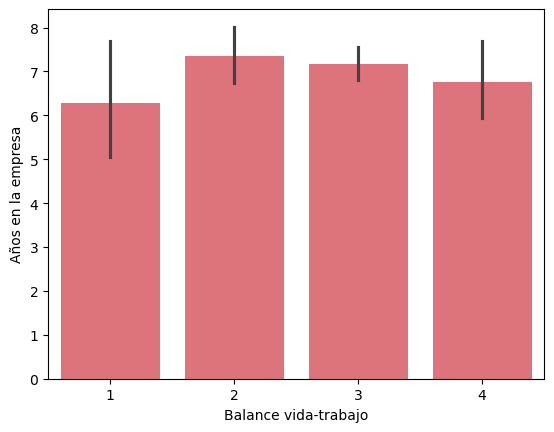

In [82]:
sns.barplot(x='work_life_balance', y='years_at_company', data=df_hr, color= "#EF626C")

plt.xlabel('Balance vida-trabajo')
plt.ylabel('Años en la empresa')

plt.show()

**Observaciones:**
- Se observa que los valores más comunes en el balance vida-trabajo son los intermedios (2 y 3).
- La valoración con 1 es la menos frecuente, pero mantiene poca distancia respecto a las otras.
- Los "bigotes" de las barras se sobreponen entre ellas, especialmente las referentes a la valoración del balance en 1 y en 4, lo que indica que no se puede asegurar una relación entre la media de años en la empresa y las valoraciones del balance.
- La diferencia entre las barras puede ser casual y no significativa, de modo que no explicaría conclusiones respecto a la retención del talento.

#### *Distribución entre el trabajo remoto y la valoración del balance vida-trabajo*

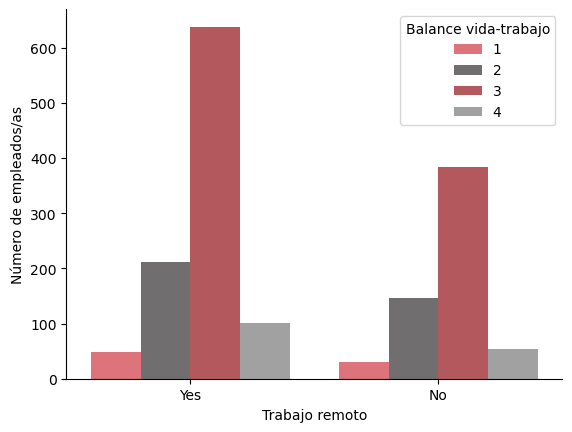

In [83]:
sns.countplot(x='remote_work', hue='work_life_balance', data=df_hr, palette=["#EF626C", "#706E6E", "#C2494E", "#A1A1A1"])

plt.gca().spines['right'].set_visible(False) #Eliminación línea derecha gráfico.
plt.gca().spines["top"].set_visible(False) #Eliminación línea superior gráfico.

plt.xlabel('Trabajo remoto')
plt.ylabel('Número de empleados/as')

plt.legend(title='Balance vida-trabajo')

plt.show()

In [84]:
distribution = df_hr.groupby("remote_work")["work_life_balance"].value_counts(normalize=True).unstack() * 100
print(distribution)

work_life_balance         1          2         3          4
remote_work                                                
No                 4.885993  23.941368  62.37785   8.794788
Yes                4.900000  21.200000  63.80000  10.100000


**Observaciones:**
- Hay más empleados/as que realizan trabajo remoto que empleados/as que no lo hacen.
- La valoración del balance vida-trabajo sigue una misma distribución para las personas que hacen teletrabajo que para las que no: la valoración más común es un 3, seguida del 2, el 4 y, en último lugar, el 1.
- Generalmente, la plantilla parece tener buena valoración del balance vida-trabajo, pero esto no se explica por si realizan trabajo remoto o no en sus jornadas laborales.


#### *Relación del trabajo remoto con el abandono*

In [85]:
attrition_remote = df_hr.groupby("attrition")["remote_work"].value_counts(normalize=True).unstack() * 100

attrition_remote

remote_work,No,Yes
attrition,,
No,38.523985,61.476015
Yes,35.521236,64.478764


**Observaciones:**
- Más personas que trabajan remoto terminan dejando la empresa(64,48%) que quienes no trabajan remoto (35,52%).

#### *Distribución de la valoración del balance vida-trabajo según el tipo de jornada*

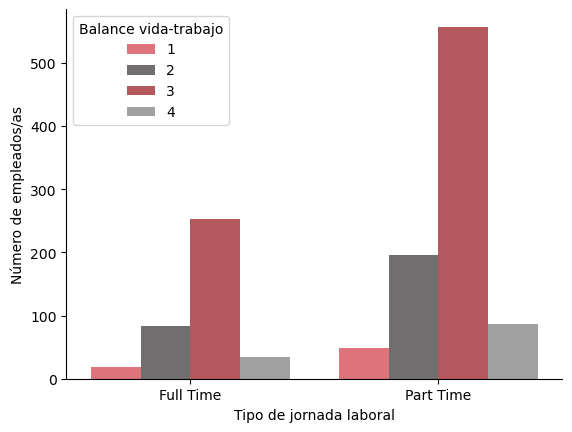

In [86]:
mask_standard_hours = df_hr[df_hr['standard_hours'] != 'Unknown']

sns.countplot(x='standard_hours', hue='work_life_balance', data=mask_standard_hours, palette=["#EF626C", "#706E6E", "#C2494E", "#A1A1A1"])

plt.gca().spines['right'].set_visible(False) #Eliminación línea derecha gráfico.
plt.gca().spines["top"].set_visible(False) #Eliminación línea superior gráfico.

plt.xlabel('Tipo de jornada laboral')
plt.ylabel('Número de empleados/as')

plt.legend(title='Balance vida-trabajo')

plt.show()

**Observaciones:**
- Se observa como hay más personal que trabaja en media jornada (part time) que jornada completa (full time).
- La valoración del balance vida-trabajo en el número 3 es la más común, especialmente entre las personas con jornadas parciales.
- Los dos tipos de jornadas tienen una misma distribución de la valoración del balance vida-trabajo: 3 en primer lugar, seguida del 2, del 4 y del 1.
- No se puede explicar el balance entre vida personal y trabajo por el tipo de jornada laboral.

#### _Focus por 'Part Time':_

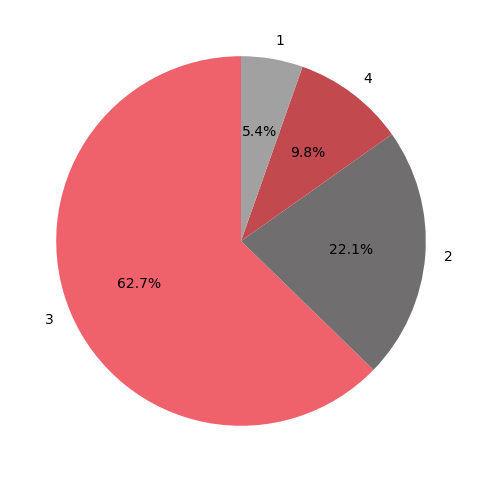

In [87]:
# Filtro por 'Part Time'
mask_part_time = df_hr[df_hr['standard_hours'] == 'Part Time']

# Value_count por cada categoría de 'work_life_balance' en 'Part Time'
df_part_time_balance = mask_part_time['work_life_balance'].value_counts()

palette = ["#EF626C", "#706E6E", "#C2494E", "#A1A1A1"]

# Piechart
plt.figure(figsize=(6,6))
plt.pie(df_part_time_balance, labels=df_part_time_balance.index, autopct='%1.1f%%', startangle=90, colors=palette)

# Mostrar el gráfico
plt.show()

**Observaciones:**

- El 62,7% de las personas que trabajan en jornada parcial valoran en un 3 sobre 4 el balance vida-trabajo.
- El 72,5% de la plantilla en jornada parcial valora positivamente el balance vida-trabajo (valores de 3 y 4).
- El 22,1% valora en un 2 su balance y el 5,4% en un 1. En total, el 27,5% da una valoración negativa del balance vida-trabajo.

#### _Focus por 'Full Time':_

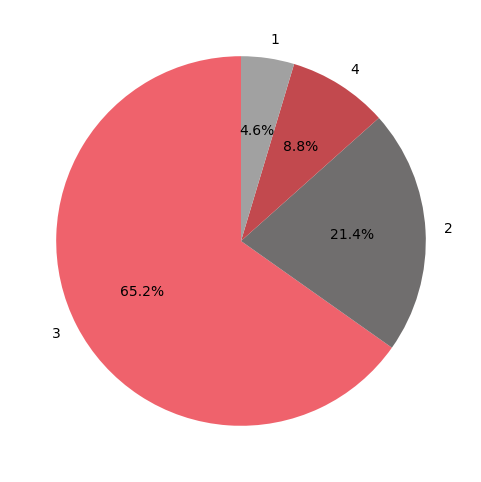

In [88]:
# Filtro por 'Full Time'
mask_full_time = df_hr[df_hr['standard_hours'] == 'Full Time']

# Value_count por cada categoría de 'work_life_balance' en 'Full Time'
df_full_time_balance = mask_full_time['work_life_balance'].value_counts()

palette = ["#EF626C", "#706E6E", "#C2494E", "#A1A1A1"]

# Piechart
plt.figure(figsize=(6,6))
plt.pie(df_full_time_balance, labels=df_full_time_balance.index, autopct='%1.1f%%', startangle=90, colors=palette)

# Mostrar el gráfico
plt.show()

**Observaciones:**

- El 65,2% de las personas que trabajan en jornada completa valoran en un 3 sobre 4 el balance vida-trabajo.
- El 74% de los empleados/as en jornada completa valoran positivamente el balance vida-trabajo (valores de 3 y 4).
- El 21,4% valoran en un 2 su balance y el 4,6% en un 1. En total, el 26% valora negativamente, con valores de 1 o 2, su balance vida-trabajo.

#### *Relación entre la valoración del balance vida-trabajo y la frecuencia de viajes laborales*

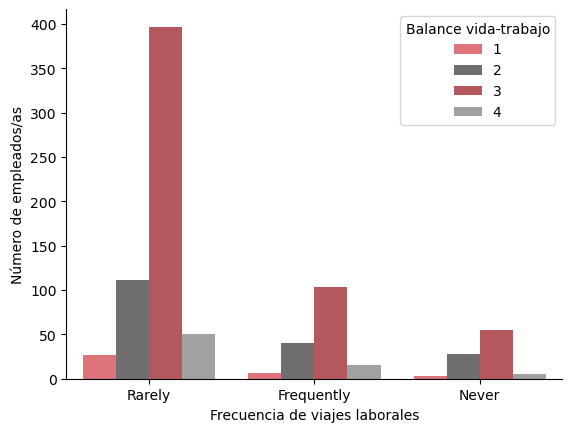

In [89]:
mask_business_travel = df_hr[df_hr['business_travel'] != 'Unknown']

sns.countplot(x='business_travel', hue='work_life_balance', data=mask_business_travel, palette=["#EF626C", "#706E6E", "#C2494E", "#A1A1A1"])


plt.gca().spines['right'].set_visible(False) #Eliminación línea derecha gráfico.
plt.gca().spines["top"].set_visible(False) #Eliminación línea superior gráfico.

plt.xlabel('Frecuencia de viajes laborales')
plt.ylabel('Número de empleados/as')

plt.legend(title='Balance vida-trabajo')

plt.show()

**Observaciones:**

- El gráfico muestra como los viajes laborales no son frecuentes en la empresa, ya que la mayoría de empleados/as casi nunca los hacen (rarely) y muy pocos los hacen frecuentemente (frequently).
- Hay pocos empleados/as que nunca hagan viajes de empresa.
- No hay relación entre la frecuencia de viajes y el balance vida-trabajo, ya que siguen todos la misma distribución (y que se repite la de los gráficos anteriores): la valoración del balance en un 3 es la más común, seguida del 2, el 4 y el 1.

### _Estadística descriptiva - tablas:_

In [90]:
df_hr.groupby('work_life_balance')['distance_from_home'].mean()

work_life_balance
1    11.379747
2    12.194986
3    10.725759
4    11.322581
Name: distance_from_home, dtype: float64

In [91]:
df_hr.groupby('work_life_balance')['salary'].mean()

work_life_balance
1    61420.508354
2    65459.463454
3    65868.895622
4    62287.692194
Name: salary, dtype: float64

In [92]:
df_hr.groupby('work_life_balance')['environment_satisfaction'].mean()

work_life_balance
1    2.670886
2    2.643454
3    2.753183
4    2.825806
Name: environment_satisfaction, dtype: float64

**Observaciones:**

Al analizar 3 variables que podrían potencialmente afectar a una mayor o menor valoración del balance vida-trabajo, extraemos las siguientes conclusiones:
- La media de la distancia de la casa al trabajo no parece influir sobre dicha puntuación.
- La media del salario es ligeramente más elevada en aquellos empleados que dieron una valoración de 2 y 3, por lo que tampoco parece existir ningún tipo de patrón.
- La media de la puntuación de satisfacción con el entorno aumenta (aunque no significativamente) conforme lo hace la valoración del balance vida-trabajo, por lo que podría haber una muy ligera relación positiva entre estas dos variables.

#### Análisis de correlaciones

Vamos a analizar las correlaciones existentes entre la columna 'attrition', que nos indica si el empleado se ha dado de baja en la empresa o no, y otras variables, que nos ayudarán a identificar factores clave que influyen en la satisfacción laboral y la retención de empleados. 

In [93]:
#importamos esta librería para poder crear un mapa de color personalizado con los colores que usaremos en la presentación
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list("custom", ['#706E6E', '#A1A1A1', '#EF626C', '#C2494E'])

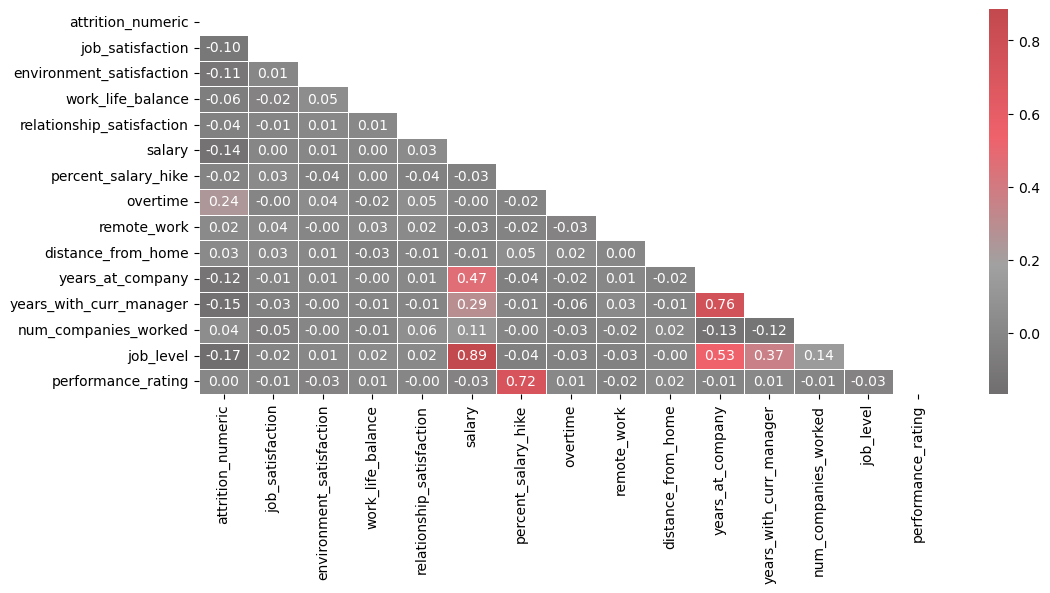

In [94]:
# Primero vamos a convertir 'attrition' a valores numéricos (No=0, Yes=1) para poder incluirla en la matriz de correlación y faciliar su análisis.
df_hr["attrition_numeric"] = df_hr["attrition"].map({"No": 0, "Yes": 1})

# Segundo, vamos a convertir estas dos variables categóricas a numéricas, ya que las consideramos relevantes para el análisis.
df_hr["overtime"] = df_hr["overtime"].map({"No": 0, "Yes": 1})
df_hr["remote_work"] = df_hr["remote_work"].map({"No": 0, "Yes": 1})

# Tercero, vamos a seleccionar qué variables numéricas pueden ser relevantes en el análisis
numerical_col = [
    "attrition_numeric", "job_satisfaction", "environment_satisfaction","work_life_balance", "relationship_satisfaction", "salary", 
    "percent_salary_hike", "overtime", "remote_work", "distance_from_home", "years_at_company","years_with_curr_manager", 
    "num_companies_worked", "job_level", "performance_rating" 
]

# Calculamos la matriz de correlación
correlation_matrix = df_hr[numerical_col].corr()

# Visualizamos las correlaciones con un mapa de calor
plt.figure(figsize=(12, 5))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, fmt=".2f", linewidths=0.5, mask=mask)
plt.show()

#### Observaciones ####

**CORRELACIÓN POSITIVA RESPECTO A ATTRITION** (factores que disminuyen la retención y que la empresa podría mejorar):
 - Horas extra (relación fuerte) -> empleados que trabajan horas extra tienen más posibilidades de dejar la empresa.
 - Número de empresas anteriores (relación moderada) -> empleados que han trabajado en otras empresas son más propensos a cambiar de empresa.
 - Distancia a casa y trabajo remoto (relación muy leve) -> no suponen un factor clave en la retención ni son factores clave por si solos para la retención. La gente no renuncia o se queda en función de si trabaja remoto o no, sino por otros factores más relevantes. Las empresas no deberían asumir que ofrecer trabajo remoto por sí solo mejorará la retención de talento.

**CORRELACION NEGATIVA RESPECTO A ATTRITION** (factores que favorecen la retención y que la empresa debe mantener):  
 - Nivel del puesto, años en la compañía y años con el/la mismo/a manager (relación fuerte) -> significa que a más antigüedad y a mayor nivel del puesto, menor posibilidad de dejar la empresa. 
 - Salario (relación fuerte) -> a mayor salario, menor posibilidad de dejar la empresa. OJO, las subidas salarialess no tienen un gran impacto en la retención. La correlación es negativa (a más subidas salariales, menor rotación) pero muy leve (no supone un factor clave en la retención).
 - Satisfacción laboral, satisfacción con el entorno de trabajo y conciliación (relación moderada) -> a menor satisfacción laboral, mayor probabilidad de dejar la empresa. Sin  embargo, la relación no es muy fuerte (-0.10), lo que sugiere que la insatisfacción laboral puede influir en la rotación pero no es el único factor y que algunos empleados satisfechos pueden llegar a renunciar, posiblemente por mejores oportunidades, aumento de salario en otra empresa o razones personales.


**OTRAS RELACIONES A DESTACAR**
- Correlación positiva entre el nivel jerárquico del puesto, años en la empresa y salario (ver abajo)
- Correlación positiva entre las subidas salariales y la calificación de rendimiento de los/as empleados/as (ver abajo)
- Correlación positiva entre los años en la empresa y los años con el/la mismo/a manager (ver abajo)


#### *Relación el nivel jerárquico del empleo y los años en la empresa*

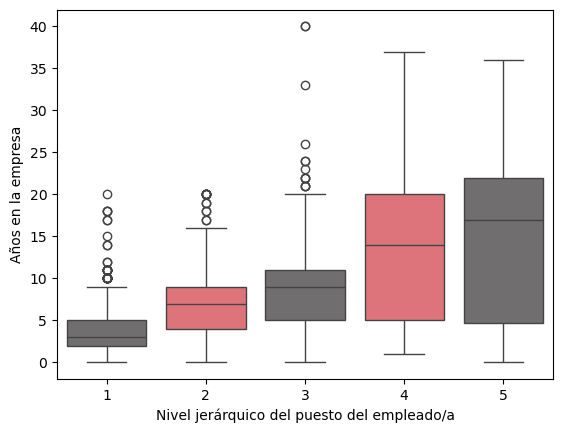

In [95]:
sns.boxplot(
    data=df_hr,
    x="job_level",
    y="years_at_company",
    palette=("#706E6E", "#EF626C")
)
plt.xlabel("Nivel jerárquico del puesto del empleado/a")
plt.ylabel("Años en la empresa")
plt.show()

##### Foco en personas que siguen en la empresa

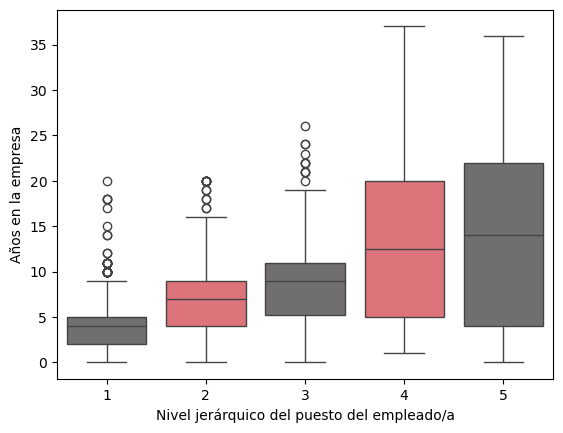

In [96]:
sns.boxplot(
    data=df_hr[df_hr['attrition'] == 'No'],
    x="job_level",
    y="years_at_company",
    palette=("#706E6E", "#EF626C")
)
plt.xlabel("Nivel jerárquico del puesto del empleado/a")
plt.ylabel("Años en la empresa")
plt.show()

##### Foco en personas que han abandonado la empresa

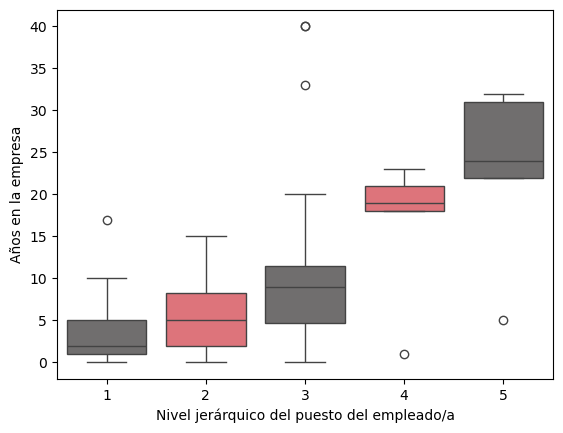

In [97]:
sns.boxplot(
    data=df_hr[df_hr['attrition'] == 'Yes'],
    x="job_level",
    y="years_at_company",
    palette=("#706E6E", "#EF626C")
)
plt.xlabel("Nivel jerárquico del puesto del empleado/a")
plt.ylabel("Años en la empresa")
plt.show()

#### Observaciones ####

- Hay una relación positiva entre los años en la empresa y el nivel jerárquico de las personas de la plantilla.
- Aun así, se observan valores extremos (outliers) en el nivel 1, 2 y 3, que demuestra que hay personas que llevan muchos años en la empresa pero no hay subido de categoría. Esto sugiere que llevar años en la empresa no siempre implica subir de categoría.
- Los rangos más altos en la jerarquía (4 y 5) tienen una distribución más amplia que los inferiores, lo cual podría explicarse habiendo personas que entran en la empresa para ocupar roles de responsabilidad, sin ascender desde puestos inferiores.
- En la gráfica que pone foco en las personas que han dejado la empresa,  podemos concluir que el motivo de su renuncia podría haber sido una falta de promoción interna (ej. outliers en el nivel 3 o mayor antigüedad en el nivel 4 y 5)

#### *Relación entre el aumento salarial y la calificación de rendimiento de los/as empleados/as*

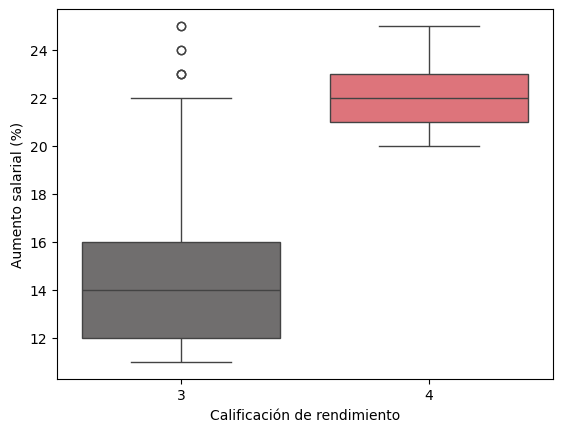

In [98]:
sns.boxplot(
    data=df_hr,
    x="performance_rating",
    y="percent_salary_hike",
    palette=("#706E6E", "#EF626C")
)
plt.xlabel("Calificación de rendimiento")
plt.ylabel("Aumento salarial (%)")

plt.show()

#### Observaciones ####

- Existe una relación positiva entre el aumento salarial y la valoración del desempeño de la plantilla (escala del 1 al 4): el salario aumenta cuando la calificación es mayor.
- Una evaluación excelente se premia con un aumento salarial de entre el 20 y el 25%.
- La mitad (50%) de las personas con una calificación de 3 sobre 4 ha obtenido un aumento salarial inferior al 14%, mientras que 3/4 partes la han obtenido por debajo del 16%.
- Pese a tener una calificación de 3 sobre 4, hay personas que han obtenido un aumento salarial más alto que la mediana de su categoría. Algunas han obtenido un aumento incluso más alto que las que han obtenido una calificación de 4.

#### *Relación entre los años en la empresa y los años con el/la mismo/a manager*

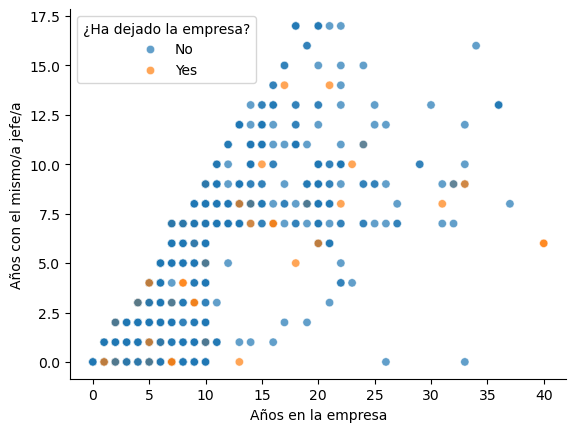

In [99]:
sns.scatterplot(
    data=df_hr,
    x="years_at_company",
    y="years_with_curr_manager",
    hue='attrition',
    color= "#EF626C",
    alpha=0.7
)

plt.xlabel("Años en la empresa")
plt.ylabel("Años con el mismo/a jefe/a")
plt.legend(title='¿Ha dejado la empresa?', loc='best')

plt.gca().spines['right'].set_visible(False) #Eliminación línea derecha gráfico.
plt.gca().spines["top"].set_visible(False) #Eliminación línea superior gráfico.

plt.show()

#### Observaciones ####

- Existe una relación positiva entre los años en la empresa y los años con el mismo jefe o jefa.
- No parece haber relación entre el haber dejado la empresa y los años en la misma o con el mismo/a jefe/a.
- Esta información sugiere que los equipos de la empresa funcionan y que los empleados/as trabajan bien con sus superiores.

#### *Relación entre las horas extra y el abandono de la empresa*

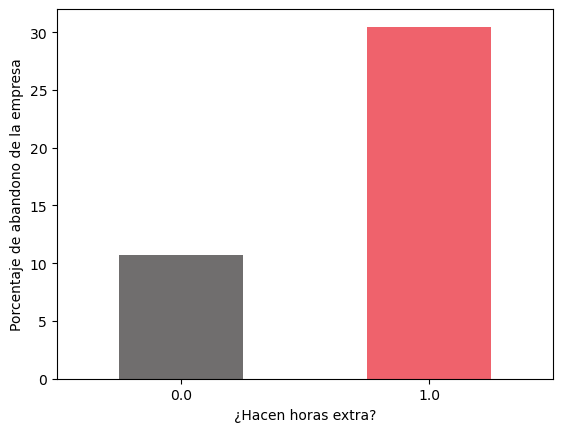

In [100]:
df_rate = df_hr.groupby("overtime")["attrition"].value_counts(normalize=True).unstack() * 100

df_rate["Yes"].plot(kind="bar", color=["#706E6E", "#EF626C"])

plt.xlabel("¿Hacen horas extra?")
plt.ylabel("Porcentaje de abandono de la empresa")
plt.xticks(rotation=0)

plt.show()

In [101]:
df_hr.groupby("attrition")["overtime"].mean()

attrition
No     0.226175
Yes    0.516556
Name: overtime, dtype: float64

#### Observaciones ####

- Tal y como sospechábamos por la información proporcionada por la matriz de correlación, observamos que la tasa de abandono es mayor entre quienes hacen horas extra.
- En promedio, quienes hacen un 22,6% de media de horas extra no han abandonado el trabajo, mientras que quienes hacen una media de 51,6%, sí lo han dejado.